# Code

**Date: February 2017**
 

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

import warnings
warnings.filterwarnings('ignore')

colors = sns.color_palette("Blues")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

**Coin-tossing MLE consistency**


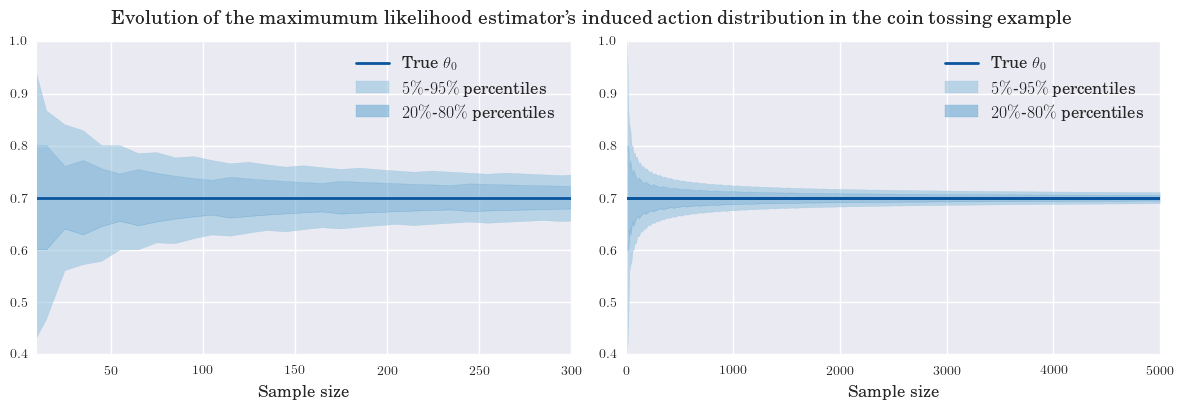

In [2]:
theta0 = .7
N = 5000

sample_sizes = np.arange(5, N, 10)

perc5 = [stats.binom(n, theta0).ppf(.05)/n for n in sample_sizes]
perc25 = [stats.binom(n, theta0).ppf(.2)/n for n in sample_sizes]
perc75 = [stats.binom(n, theta0).ppf(.8)/n for n in sample_sizes]
perc95 = [stats.binom(n, theta0).ppf(.95)/n for n in sample_sizes]

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle("Evolution of the maximumum likelihood estimator's induced action distribution in the coin tossing example", y = 1.02, fontsize = 14)
small_sample = 200
ax[0].fill_between(sample_sizes[:small_sample], perc5[:small_sample], perc25[:small_sample], 
                   color = colors[2], alpha = .5, label = '$5\%$-$95\%$ percentiles')
ax[0].fill_between(sample_sizes[:small_sample], perc25[:small_sample], perc75[:small_sample], 
                   color = colors[3], alpha = .5, label = '$20\%$-$80\%$ percentiles')
ax[0].fill_between(sample_sizes[:small_sample], perc75[:small_sample], perc95[:small_sample], 
                   color = colors[2], alpha = .5)
ax[0].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
ax[0].set_xlim([10, 300])
ax[0].set_ylim([0.4, 1])
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].legend(loc='best', fontsize = 12)

ax[1].fill_between(sample_sizes, perc5, perc25, color = colors[2], alpha = .5, label = '$5\%$-$95\%$ percentiles')
ax[1].fill_between(sample_sizes, perc25, perc75, color = colors[3], alpha = .5, label = '$20\%$-$80\%$ percentiles')
ax[1].fill_between(sample_sizes, perc75, perc95, color = colors[2], alpha = .5)
ax[1].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
ax[1].set_ylim([0.4, 1])
ax[1].set_xlabel('Sample size', fontsize = 12)
ax[1].legend(loc='best', fontsize = 12)
ax[1].axhline(theta0, color = colors[5], lw = 2, label = r'True $\theta_0$')
plt.tight_layout()
plt.savefig('asymptotic_cointoss_consistency.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Uniform LLN -- coin-tossing tail probabilities**

In [95]:
def relative_entropy(prob0, theta0, a):
    return prob0 * np.log(theta0/a) + (1 - prob0) * np.log((1 - theta0)/(1 - a))

def loss_distribution(l, aa, loss_func, true_dist, upper):
    """
    Uses the formula for the change of discrete random variable. It takes care of the 
    fact that the loss is not monotone.
    """
    eps = 1e-10
    n, theta0 = true_dist.args
    
    if loss_func == 'relative_entropy':
        frac = sp.optimize.bisect(lambda x: relative_entropy(x, theta0, aa) - l, a = eps, b = 1 - eps)
    
    elif loss_func == 'quadratic':
        frac = (l - aa**2)/((1 - aa)**2 - aa**2)

    if aa < theta0:
        if upper:
            return 1 - true_dist.cdf(frac * n)
        else:
            return true_dist.cdf(frac * n)
    else:
        if upper:
            return true_dist.cdf(frac * n)
        else:
            return 1 - true_dist.cdf(frac * n)
        
def prob(l, a, true_dist):
    n, theta0 = true_dist.args
    #true = relative_entropy(theta0, theta0, a)
    true = theta0 * (1 - a)**2 + (1 - theta0) * a**2
    
    upper = true + l
    lower = true - l
    
    first = loss_distribution(upper, a, "quadratic", true_dist, upper = True)
    second = loss_distribution(lower, a, "quadratic", true_dist, upper = False)
    
    return first + second

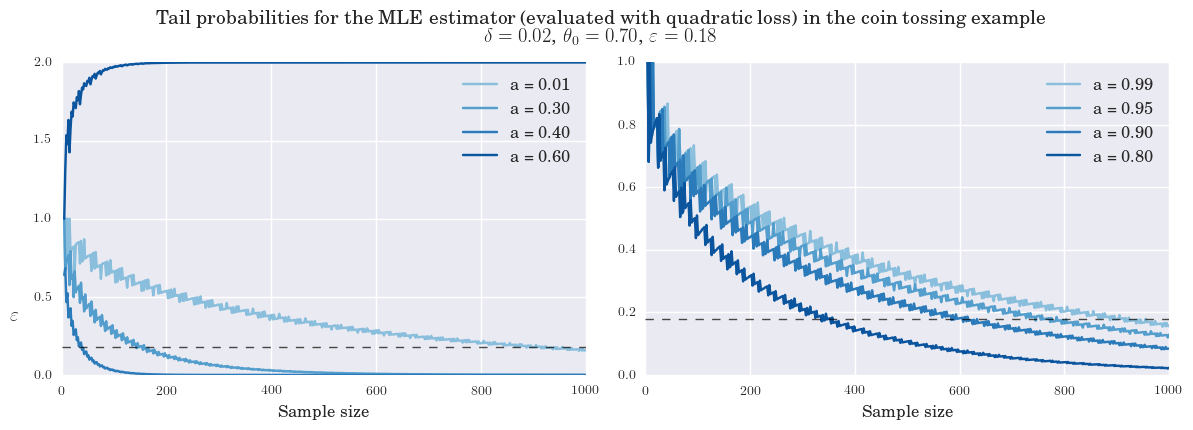

In [100]:
sample_size = np.arange(5, 1000, 2)
action_grid1 = [.01, .3, .4, .6]
action_grid2 = [.99, .95, .9, .8]
delta = .02
epsilon = .18

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle('Tail probabilities for the MLE estimator (evaluated with quadratic loss) in the coin tossing example \n' + 
             r"$\delta = {:1.2f}$,  $\theta_0 = {:1.2f}$, $\varepsilon = {:1.2f}$".format(delta, theta0, epsilon), 
            fontsize = 14, y = 1.07)
for i, a in enumerate(action_grid1):
    ax[0].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
#    n_star = sp.optimize.bisect(lambda nn: prob(delta, a, stats.binom(nn, theta0))-epsilon, .1, 1000)
#    ax[0].vlines(n_star, 0, epsilon, color = colors[2 + i], alpha = .9)
ax[0].axhline(epsilon, linestyle='--', color='k', lw =1, alpha=.7)
ax[0].legend(loc = 'best', fontsize = 12)
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].set_ylabel(r'$\varepsilon$', fontsize = 14, rotation=0)
ax[0].yaxis.set_label_coords(-.09, .16)

for i, a in enumerate(action_grid2):
    ax[1].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
#    n_star = sp.optimize.bisect(lambda nn: prob(delta, a, stats.binom(nn, theta0))-epsilon, .1, 1000)
#    ax[1].vlines(n_star, 0, epsilon, color = colors[2 + i], alpha = .9)
ax[1].axhline(epsilon, linestyle='--', color='k', lw =1, alpha=.7)
ax[1].legend(loc = 'best', fontsize = 12)
ax[1].set_xlabel('Sample size', fontsize = 12)
plt.tight_layout()
plt.savefig('asymptotic_cointoss_tail.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Concentration inequalities**

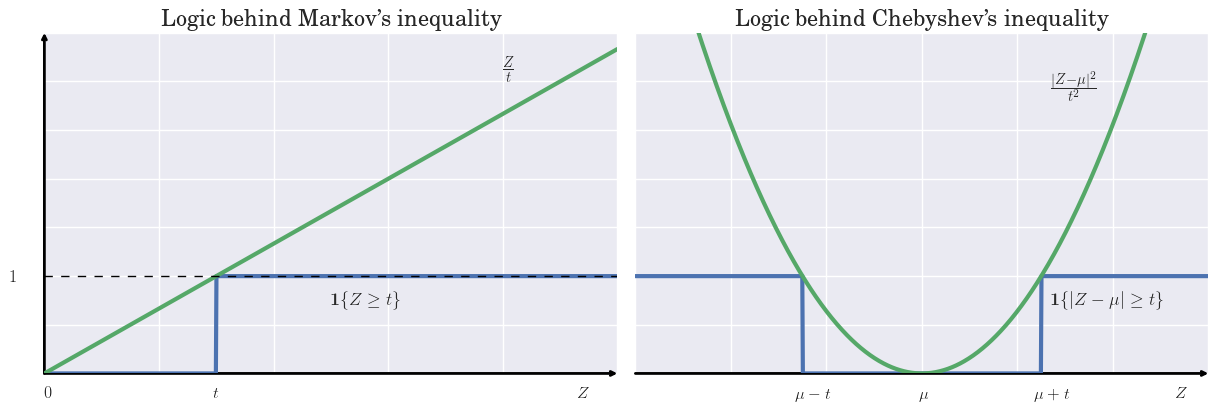

In [14]:
z = np.linspace(0, 10, 1000)
t = 3

f1 = (z >= t)
f2 = z / t

colors = sns.color_palette()

fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
ax[0].add_artist(ConnectionPatch(xyA=(0, 0), xyB=(10, 0), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))
ax[0].add_artist(ConnectionPatch(xyA=(0, 0), xyB=(0, 3.5), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))

ax[0].plot(z, f1, color = colors[0], lw = 3, label = r'$\mathbf{1}\{Z \geq t\}$')
ax[0].plot(z, f2, color = colors[1], lw = 3, label = r'$\frac{Z}{t}$')
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].text(9.3, -.25, r'$Z$', fontsize = 12)
ax[0].text(8, 3, r'$\frac{Z}{t}$', fontsize = 15)
ax[0].text(5, .7, '$\mathbf{1}\{Z \geq t\}$', fontsize = 13)
ax[0].text(t - .05, -.25, '$t$', fontsize = 12)
ax[0].text(0, -.25, '$0$', fontsize = 12)
ax[0].text( -.6, .93, r'$1$', fontsize = 12)
ax[0].axhline(1, linestyle = '--', color = 'k', lw = 1)
ax[0].set_title('Logic behind Markov\'s inequality', fontsize=16)

t = 2.5
mu = 2
z = np.linspace(mu - 6, mu + 6, 1000)

g1 = (z >= mu + t) + (z <= mu - t)
g2 = ((z - mu) / t)**2

ax[1].add_artist(ConnectionPatch(xyA=(mu - 6, 0), xyB=(mu + 6, 0), coordsA="data", coordsB="data",
                                 arrowstyle="->", mutation_scale=10, lw = 2))
ax[1].plot(z, g1, color = colors[0], lw = 3, label = r'$\mathbf{1}\{Z \geq t\}$')
ax[1].plot(z, g2, color = colors[1], lw = 3, label = r'$Z/t$')
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].text(mu + 5.3, -.25, r'$Z$', fontsize = 12)
ax[1].text(4.7, 2.8, r'$\frac{|Z-\mu|^2}{t^2}$', fontsize = 15)
ax[1].text(4.7, .7, r'$\mathbf{1}\{|Z -\mu |\geq t\}$', fontsize = 13)
ax[1].text(mu - .05, -.25, r'$\mu$', fontsize = 12)
ax[1].text(mu + t - .15, -.25, r'$\mu + t$', fontsize = 12)
ax[1].text(mu - t - .15, -.25, r'$\mu - t$', fontsize = 12)
#ax[1].text(mu - 6 - .6, .93, r'$1$', fontsize = 12)
ax[1].set_title('Logic behind Chebyshev\'s inequality', fontsize=16)
ax[1].set_ylim([0, 3.5])
plt.tight_layout()
plt.savefig('asymptotic_markov_chebyshev.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

**Rademacher complexity -- coin-tossing**


In [7]:
# Compute the Rademacher compelxity for the coin tossing example
n, k = 10, 6

def given_epsilon_path(n3, n4, n, k):
    n1 = n - k - n3
    n2 = k - n4
    
    diff1 = n1 - n3
    diff2 = n2 - n4
    
    term1 = abs(diff1/n)
    term2 = abs(diff2/n)
    
    if diff1 + diff2 != 0:
        term3 = abs((diff2/(diff1 + diff2))**2 * (diff1/n) + (diff1/(diff1 + diff2))**2 * (diff2/n))
    else:
        term3 = 0
        
    return max(term1, term2, term3)
    
    
def empirical_rademacher(n, k):
    prob_row = stats.binom(k, .5).pmf(np.arange(k + 1)).reshape(k + 1, 1)
    prob_col = stats.binom(n - k, .5).pmf(np.arange(n - k + 1)).reshape(1, n - k + 1)    
    prob_matrix = prob_row * prob_col
    
    emp_rad = 0
    for i in range(k + 1):               # loop for n4
        for j in range(n - k + 1):       # loop for n3
            emp_rad += given_epsilon_path(j, i, n, k) * prob_matrix[i, j]
    
    return emp_rad

def rademacher_complexity(n): 
    true_prob = stats.binom(n, theta0).pmf(np.arange(n + 1)).reshape(n + 1, 1)
    rademacher = 0
    
    for i in range(n + 1):
        rademacher += true_prob[i] * empirical_rademacher(n, i)
    
    return rademacher[0]


```python 

samples = np.arange(10, 1000, 50)
RC_ = [rademacher_complexity(n) for n in samples]

data = pd.DataFrame(data=RC_)
data.to_pickle("./randemacher.pickle")
```

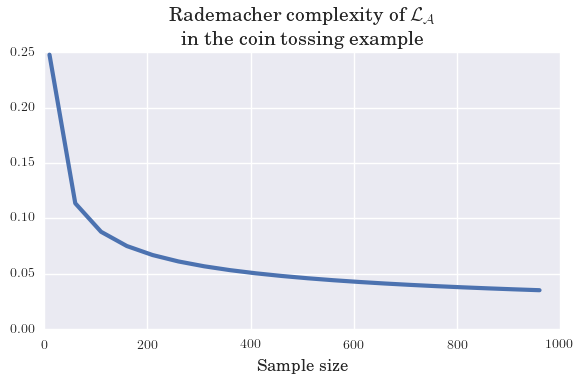

In [8]:
samples = np.arange(10, 1000, 50)
RC = np.asarray(pd.read_pickle("./randemacher.pickle")).squeeze()

fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(samples, RC, lw = 3)
ax.set_title("Rademacher complexity of $\mathcal{L}_{\mathcal{A}}$ \nin the coin tossing example", fontsize = 14)
ax.set_xlabel('Sample size', fontsize = 12)
ax.set_ylim([0, .25])
plt.tight_layout()
plt.savefig('asymptotic_rademacher_cointoss.png', format = 'png', dpi = 800, bbox_inches='tight')
plt.show()

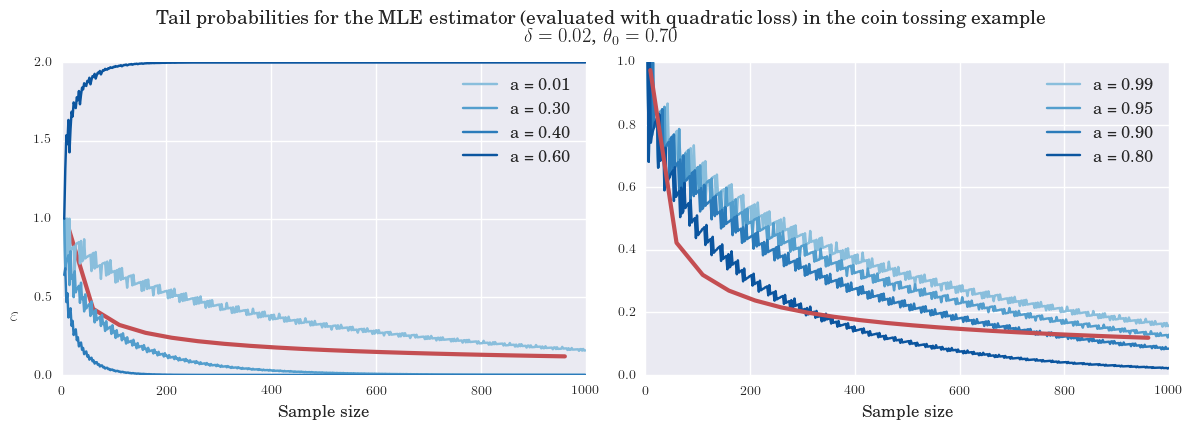

In [102]:
colors = sns.color_palette("Blues")
RC_bound = 2*RC + np.sqrt(np.log(2/delta)/(2*samples))

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

fig.suptitle('Tail probabilities for the MLE estimator (evaluated with quadratic loss) in the coin tossing example \n' + 
             r"$\delta = {:1.2f}$,  $\theta_0 = {:1.2f}$".format(delta, theta0), 
            fontsize = 14, y = 1.07)
ax[0].plot(samples, RC_bound, lw = 3, color = sns.color_palette()[2])
for i, a in enumerate(action_grid1):
    ax[0].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
ax[0].legend(loc = 'best', fontsize = 12)
ax[0].set_xlabel('Sample size', fontsize = 12)
ax[0].set_ylabel(r'$\varepsilon$', fontsize = 14, rotation=0)
ax[0].yaxis.set_label_coords(-.09, .16)

for i, a in enumerate(action_grid2):
    ax[1].plot(sample_size, [prob(delta, a, stats.binom(nn, theta0)) for nn in sample_size], 
               label = r'a = {:1.2f}'.format(a), color = colors[2 + i])
ax[1].plot(samples, RC_bound, lw = 3, color = sns.color_palette()[2])
ax[1].legend(loc = 'best', fontsize = 12)
ax[1].set_xlabel('Sample size', fontsize = 12)
plt.tight_layout()

plt.savefig('rademacher_tail_bound.png', format = 'png', dpi=800 ,bbox_inches='tight')

**Rademacher -- sinusoid classification**

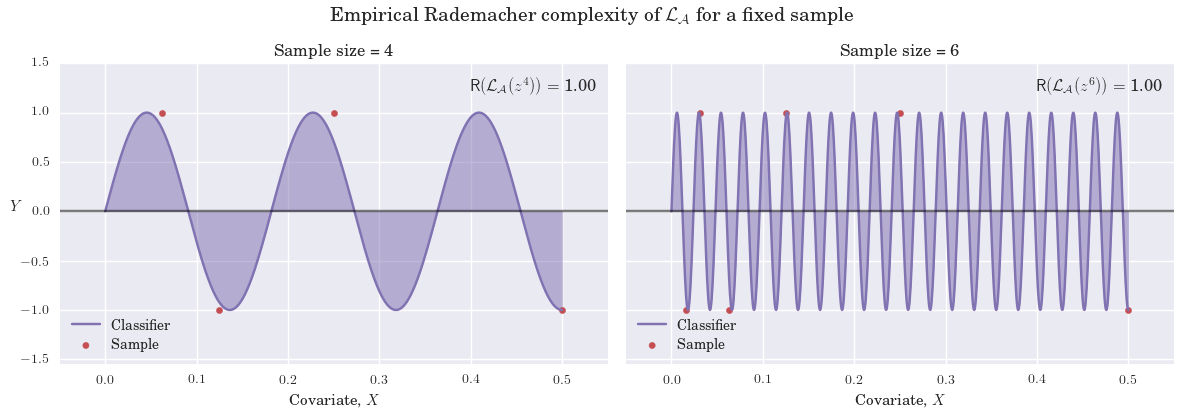

In [72]:
def rademacher(n):
    '''Generates N Rademcaher random variables.'''
    aux = np.random.rand(int(n))
    return np.array([1 if x >= .5 else -1 for x in aux])

def rad_figure(n):
    x = np.array([2**(-(i+1)) for i in range(n)])
    y = rademacher(int(n))

    y_aux = np.array([1 if r > 0 else 0 for r in y])
    x_aux = np.array([2**((i+1)) for i in range(int(n))])

    a = np.pi*((1-y_aux) @ x_aux + 1)

    c = np.array([1 if np.sin(a*x) > 0 else -1 for x in x])
    R = c @ y / int(n)

    return a, x, y, R

np.random.seed(12)

n1, n2 = 4, 6

a1, x1, y1, R1 = rad_figure(n1)
a2, x2, y2, R2 = rad_figure(n2)

x_axis = np.linspace(0, .5, 1000)

fig, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
fig.suptitle(r'Empirical Rademacher complexity of $\mathcal{L}_{\mathcal{A}}$ for a fixed sample', 
             fontsize=14, y=1.04)

sin1 = np.sin(a1*x_axis)
ax[0].plot(x_axis, sin1, color = colors[3], label = 'Classifier')
ax[0].fill_between(x_axis, 0, sin1, color = colors[3], alpha = .5)
ax[0].scatter(x1, y1, color = colors[2], label = 'Sample')
ax[0].set_xlim([-.05, .55])
ax[0].set_ylim([-1.55, 1.5])
ax[0].set_xlabel(r"Covariate, $X$")
ax[0].set_ylabel(r"$Y$", rotation = 0)
ax[0].text(.4, 1.2, r'$\mathsf{R}(\mathcal{L}_{\mathcal{A}}(' + r'z^{})) = $'.format({int(n1)}) + ' {:.2f}'.format(R1), fontsize=12)
ax[0].set_title(r'Sample size = {}'.format({int(n1)}), fontsize=12)
ax[0].axhline(0, color = 'k', alpha=.5)
ax[0].legend(loc=3)

sin2 = np.sin(a2*x_axis)
ax[1].plot(x_axis, sin2, color = colors[3], label = 'Classifier')
ax[1].fill_between(x_axis, 0, sin2, color = colors[3], alpha = .5)
ax[1].scatter(x2, y2, color = colors[2], label = 'Sample')
ax[1].set_xlim([-.05, 0.55])
ax[1].set_ylim([-1.55, 1.5])
ax[1].set_xlabel(r"Covariate, $X$")
ax[1].text(.4, 1.2, r'$\mathsf{R}(\mathcal{L}_{\mathcal{A}}(' + r'z^{})) = $'.format({int(n2)}) + ' {:.2f}'.format(R2), fontsize=12)
ax[1].set_title(r'Sample size = {}'.format({int(n2)}), fontsize=12)
ax[1].axhline(0, color = 'k', alpha=.5)
ax[1].legend(loc=3)

plt.tight_layout()
plt.savefig('asymptotic_rademacher_sinusoid.png', format = 'png', dpi=800 ,bbox_inches='tight')